In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [22]:
#excel_file = pd.read_excel('falls1.xls', sheet_name=None)

# Corrected file paths
file_path1 = r'C:\Users\LRE\Desktop\Master-FH\MT-ITBA\basicEDA\falls1.xls'
file_path2 = r'C:\Users\LRE\Desktop\Master-FH\MT-ITBA\basicEDA\falls2.xlsx'

def load_and_concatenate_sheets(file_path):
    # Load the Excel file
    xls = pd.ExcelFile(file_path)
    # List comprehension to load all sheets into a list of dataframes
    all_sheets = [xls.parse(sheet_name) for sheet_name in xls.sheet_names]
    # Concatenate all dataframes into one
    concatenated_df = pd.concat(all_sheets, ignore_index=True)
    return concatenated_df

# Concatenate sheets
data1 = load_and_concatenate_sheets(file_path1)
data2 = load_and_concatenate_sheets(file_path2)

# Concatenate datasets
final_data = pd.concat([data1, data2], ignore_index=True)

# Check if not empty: head and describe
if not final_data.empty:
    print(final_data.head())
    print(final_data.describe())
else:
    print("Data is empty. Check file content and sheet names.")

   pitch   roll   yaw   gyroy   gyrox   gyroz  time(ms)   count  time (ms)  \
0  -0.18  -1.02  2.70   -2.64    1.32   -1.56      35.0       1        NaN   
1  -0.09  -1.02  2.66   -1.85    0.51   -0.39      70.0       2        NaN   
2  -0.02  -0.93  2.65   -2.05    0.86   -0.36     105.0       3        NaN   
3   0.01  -0.89  2.61   -2.34    0.33   -0.84     140.0       4        NaN   
4   0.06  -0.86  2.58   -2.28    0.75   -0.99     175.0       5        NaN   

   Unnamed: 0  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
             pitch         roll          yaw        gyroy        gyrox  \
count  2982.000000  2982.000000  2982.000000  2982.000000  2982.000000   
mean     24.638397   -12.441804    20.710684    16.922656     2.799504   
std      60.668762    19.414862    32.585661    59.343482    49.657605   
min    -176.440000   -65.990000   -73.610000  -496.420000  -288.290000   
25%      -6.617500   -24.640000     2.210000    -0.040000    -3.3

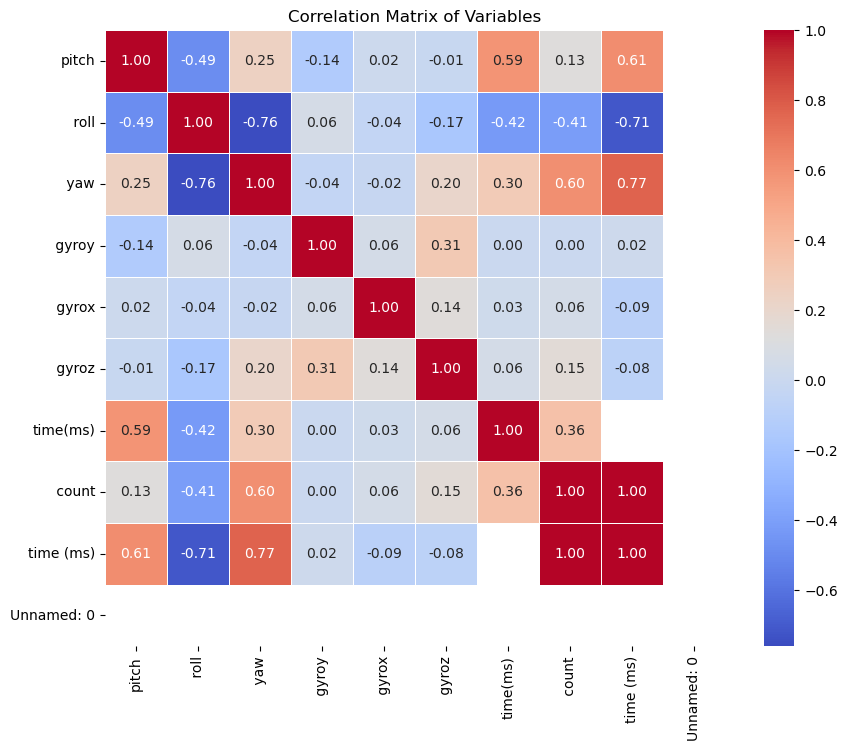

In [27]:
# Correlation Matrix
correlation_matrix = final_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

In [30]:
print(final_data.columns)

Index(['pitch', ' roll', ' yaw', ' gyroy', ' gyrox', ' gyroz', 'time(ms)',
       ' count', 'time (ms)', 'Unnamed: 0'],
      dtype='object')


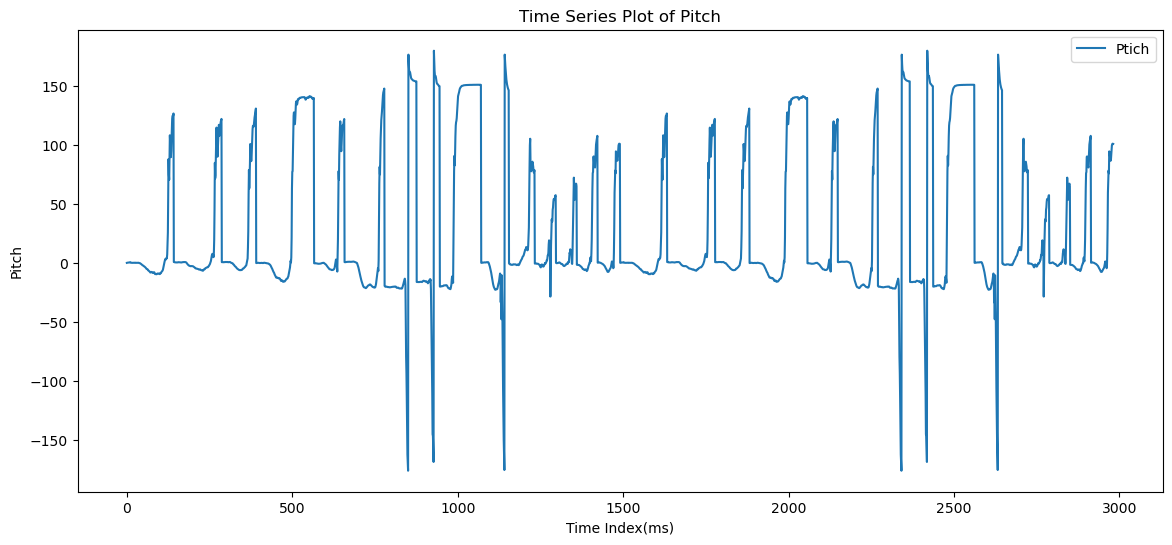

In [41]:
# Time series pitch data
plt.figure(figsize=(14, 6))
plt.plot(final_data.index, final_data['pitch'], label='Ptich')
plt.title('Time Series Plot of Pitch')
plt.xlabel('Time Index(ms)')
plt.ylabel('Pitch')
plt.legend()
plt.show()

In [52]:
#...
#...
# Spikes and Patterns Analysis
# Data Smoothing
# Frequency Analysis

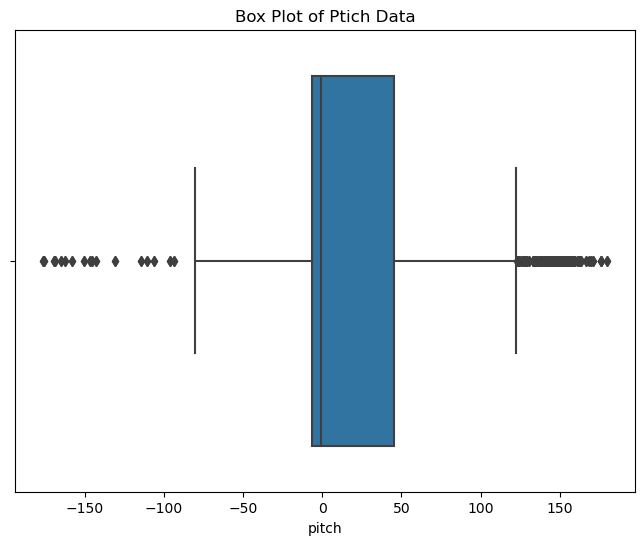

In [50]:
# Boxplot pitch data
plt.figure(figsize=(8, 6))
sns.boxplot(x=final_data['pitch'])
plt.title('Box Plot of Ptich Data')
plt.show()

In [54]:
# Identify Outliers: 
Q1 = final_data['pitch'].quantile(0.25)
Q3 = final_data['pitch'].quantile(0.75)
IQR = Q3 - Q1
outliers = final_data[(final_data['pitch'] < (Q1 - 1.5 * IQR)) | (final_data['pitch'] > (Q3 + 1.5 * IQR))]




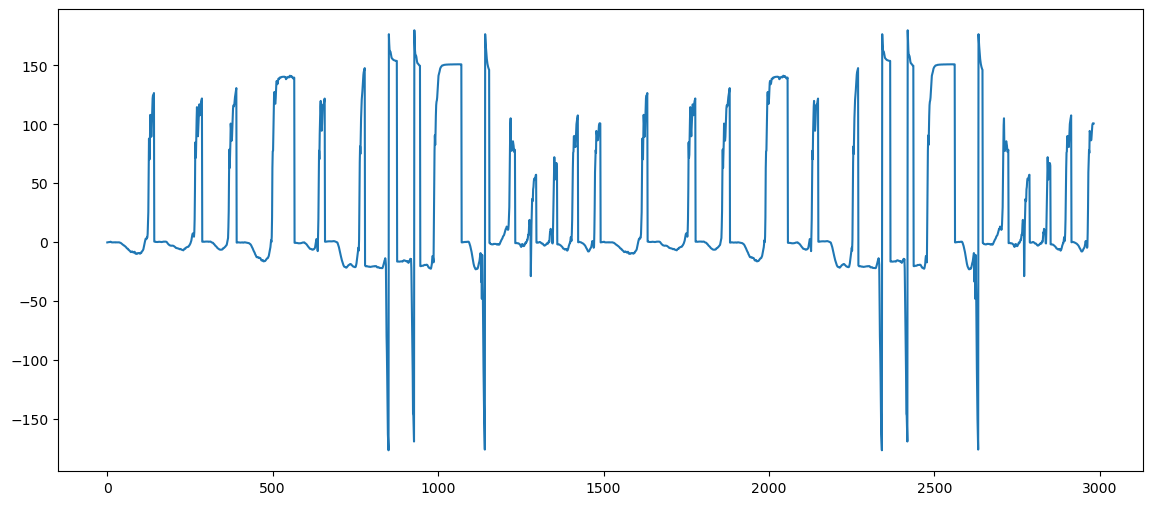

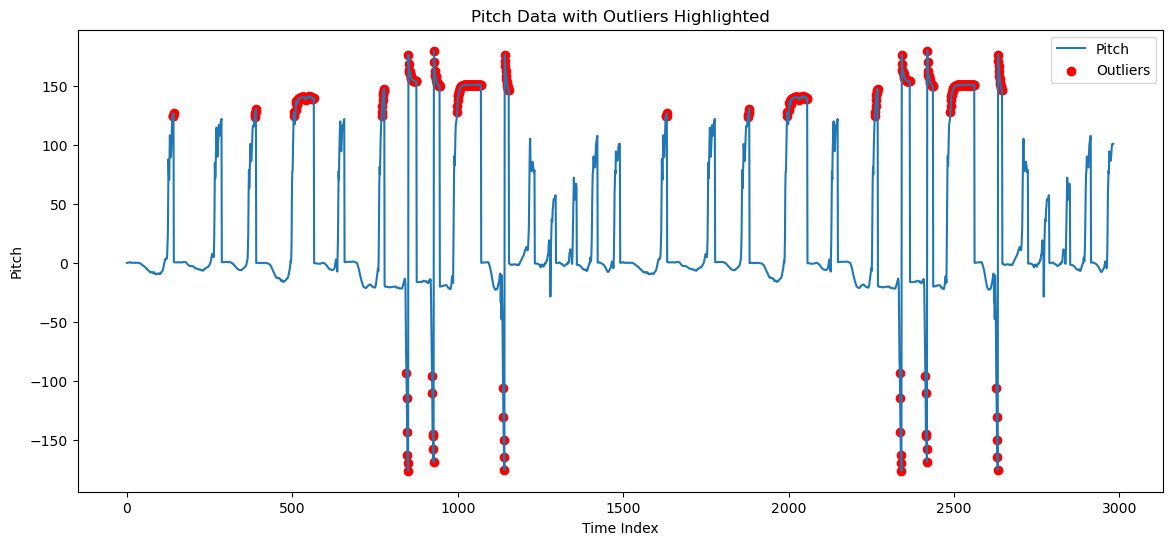

In [55]:
# Highlighted Outliers: 
plt.figure(figsize=(14, 6))
plt.plot(final_data['pitch'], label='Pitch')
plt.scatter(outliers.index, outliers['pitch'], color='red', label='Outliers')
plt.title('Pitch Data with Outliers Highlighted')
plt.xlabel('Time Index')
plt.ylabel('Pitch')
plt.legend()
plt.show()

In [12]:
dataset_combined['pitch'].value_counts(normalize=True).plot.line()

<Axes: xlabel='pitch'>